<a href="https://colab.research.google.com/github/teretenuche/Dengue_prediction/blob/Projects/Nuche_Pascual_Dengue_prediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 0. load data in DataFrame
import pandas as pd
import io
import numpy as np

In [ ]:
# 0. load data from file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dengue_features_train.csv to dengue_features_train.csv
User uploaded file "dengue_features_train.csv" with length 287139 bytes


In [ ]:
dengue_features=pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
dengue_features

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [ ]:
# 0. load data from file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dengue_labels_train.csv to dengue_labels_train.csv
User uploaded file "dengue_labels_train.csv" with length 19582 bytes


In [ ]:
dengue_labels=pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
dengue_labels

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1


In [ ]:
dengue = pd.merge(dengue_features, dengue_labels, on=('city','year','weekofyear'))
dengue

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [ ]:
#Elimino todas las filas que tienen valores nulos
df=dengue.dropna()
df.isnull().values.any()

False

In [ ]:
#Elimino las variables mencionadas al final de la AG1
df_dengue=df.drop(['city','week_start_date','reanalysis_relative_humidity_percent','reanalysis_sat_precip_amt_mm','ndvi_se', 'ndvi_sw', 'ndvi_ne','reanalysis_air_temp_k'], axis=1)
df_dengue

,year,weekofyear,ndvi_nw,precipitation_amt_mm,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1990,18,0.103725,12.42,297.742857,292.414286,299.8,295.9,32.00,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,1990,19,0.142175,22.82,298.442857,293.951429,300.9,296.4,17.94,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,1990,20,0.172967,34.54,298.878571,295.434286,300.5,297.3,26.10,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,1990,21,0.245067,15.36,299.228571,295.310000,301.4,297.0,13.90,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,1990,22,0.262200,7.52,299.664286,295.821429,301.9,297.5,12.20,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2010,21,0.318900,55.30,300.771429,296.825714,309.7,294.5,45.00,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,2010,22,0.160371,86.47,299.392857,296.452857,308.5,291.9,207.10,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,2010,23,0.146057,58.94,297.592857,295.501429,305.5,292.4,50.60,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,2010,24,0.245771,59.67,297.521429,295.324286,306.1,291.9,62.33,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [ ]:
#Ordeno el data frame por orden cronológico
dengue=df_dengue.sort_values(by=['year', 'weekofyear'])
dengue

,year,weekofyear,ndvi_nw,precipitation_amt_mm,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1990,18,0.103725,12.42,297.742857,292.414286,299.8,295.9,32.00,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,1990,19,0.142175,22.82,298.442857,293.951429,300.9,296.4,17.94,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,1990,20,0.172967,34.54,298.878571,295.434286,300.5,297.3,26.10,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,1990,21,0.245067,15.36,299.228571,295.310000,301.4,297.0,13.90,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,1990,22,0.262200,7.52,299.664286,295.821429,301.9,297.5,12.20,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2010,21,0.318900,55.30,300.771429,296.825714,309.7,294.5,45.00,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,2010,22,0.160371,86.47,299.392857,296.452857,308.5,291.9,207.10,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,2010,23,0.146057,58.94,297.592857,295.501429,305.5,292.4,50.60,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,2010,24,0.245771,59.67,297.521429,295.324286,306.1,291.9,62.33,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [ ]:
dengue.describe()

,year,weekofyear,ndvi_nw,precipitation_amt_mm,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,2001.303586,26.497081,0.134362,47.578932,299.243495,295.303517,303.661301,295.583903,41.548791,16.809640,5.136673,27.228617,8.247724,32.569141,22.075480,40.915847,21.197665
std,5.345922,14.895735,0.120743,43.179096,1.261411,1.500510,3.298576,2.590202,44.486750,1.518780,3.593513,1.267688,2.175908,1.950095,1.553057,48.996480,30.856555
min,1990.000000,1.000000,-0.456100,0.000000,294.892857,289.642857,297.800000,286.900000,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1998.000000,14.000000,0.051587,12.550000,298.289286,294.216429,301.100000,293.600000,13.525000,15.654286,2.357143,26.430952,6.592857,31.400000,21.100000,9.700000,4.000000
50%,2002.000000,26.000000,0.126800,41.410000,299.321429,295.682857,302.600000,296.000000,28.600000,17.172857,3.000000,27.450000,7.471429,32.800000,22.100000,24.700000,11.000000
75%,2006.000000,39.000000,0.220714,71.765000,300.221429,296.502143,306.000000,297.900000,54.750000,18.012857,8.028571,28.157143,10.012500,33.900000,23.300000,56.050000,26.000000
max,2010.000000,52.000000,0.454429,390.600000,302.614286,298.450000,313.200000,299.900000,570.500000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,329.000000


In [ ]:
#Divido el data set
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [ ]:
# 0.1 features and labels

dengue.reset_index(drop=True, inplace=True)
train = dengue.loc[0:len(dengue)*0.4]
test  = dengue.loc[len(dengue)*0.6:,]

display_side_by_side(train.tail(),test.head())

,year,weekofyear,ndvi_nw,precipitation_amt_mm,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
475,2001,18,0.17900,94.77,298.650000,295.740000,305.6,293.1,103.87,17.305714,7.414286,27.625000,11.325000,35.2,20.5,51.0,0
476,2001,19,0.07050,59.89,299.500000,295.365714,302.0,297.4,16.80,16.771429,3.200000,27.485714,7.057143,32.2,22.8,64.3,13
477,2001,19,0.18860,45.56,298.200000,296.332857,305.1,292.1,85.90,17.891429,7.085714,26.600000,8.800000,32.7,21.4,66.0,0
478,2001,20,0.09410,77.36,299.257143,295.855714,301.7,297.3,78.10,17.268571,2.942857,27.857143,6.042857,32.2,24.4,60.5,8
479,2001,21,0.07736,35.54,299.985714,295.345714,302.2,297.6,2.00,16.730000,3.828571,28.828571,8.328571,33.9,23.3,7.4,8
,year,weekofyear,ndvi_nw,precipitation_amt_mm,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
720,2003,52,-0.039800,1.96,299.178571,295.025714,300.8,297.2,9.14,16.375714,2.700000,26.014286,6.500000,30.0,21.1,12.0,22
721,2003,52,0.230656,49.42,297.050000,295.682857,302.6,294.3,82.68,17.172857,4.185714,27.300000,9.600000,33.1,22.3,185.7,1
722,2004,2,0.017200,0.00,297.571429,292.374286,299.3,296.1,20.70,13.881429,2.028571,24.385714,5.557143,27.8,20.6,15.6,20
723,2004,2,0.308850,78.53,298.742857,296.637143,304.0,294.9,55.30,18.255714,6.200000,27.433333,8.666667,34.2,22.4,137.2,5


In [ ]:
# reseteamos el index con el fin de no evitar problemas en la validación cruzada
train.reset_index(drop = True, inplace = True)

In [ ]:
##Parametrizacion
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint #Para hacer intervalos aleatorios de los valores

from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
regressor = RandomForestRegressor()

In [ ]:
param_dist = {"n_estimators": [32, 64, 128], # Number of trees in random forest
              "max_features": ['auto', 'sqrt'], # Number of features to consider at every split
              "max_depth": [8,4, 2], # Maximum number of levels in tree
              "min_samples_split": [2, 4, 6], #  Minimum number of samples required to split a node
              "min_samples_leaf": [8, 12, 16], # Minimum number of samples required at each leaf node
              "bootstrap": [True, False] # Method of selecting samples for training each tree
            }

In [ ]:
#Busqueda de validacion cruzada
grid_regres = GridSearchCV(estimator = regressor, param_grid= param_dist, cv = 5)

# Fit the random search model
grid_regres.fit(X = train.drop(['total_cases'], axis=1), 
                           y = train['total_cases'])

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'bootstrap': [True, False], 'ma

In [ ]:
grid_regres.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=12, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=128,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [ ]:
# choose the best
best_grid = grid_regres.best_estimator_

# fit and predict
best_grid.fit( X = train.drop(['total_cases'], axis=1), y = train['total_cases'])
y_pred = best_grid.predict(X = test.drop(['total_cases'], axis = 1))

# EVALUATE 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['total_cases'], y_pred)
print ('MAE', mae)

MAE 18.48958500914689


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


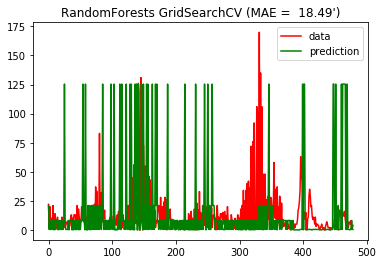

In [ ]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(test['total_cases'].shape[0]))
plt.plot(xx, test['total_cases'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests GridSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

In [ ]:
#Ahora utilizaré la técnica RandomizedSearch
param_dist = {"n_estimators": [4, 8, 16, 32, 64, 128], # Number of trees in random forest
              "max_features": ['auto', 'sqrt'], # Number of features to consider at every split
              "max_depth": [16, 12,8,4, 2,None], # Maximum number of levels in tree
              "min_samples_split": sp_randint(2, 50), #  Minimum number of samples required to split a node
              "min_samples_leaf": sp_randint(1, 50), # Minimum number of samples required at each leaf node
              "bootstrap": [True, False], # Method of selecting samples for training each tree
              "criterion": ["mse", "mae"]}

In [ ]:
rnd_regres = RandomizedSearchCV(estimator = regressor, param_distributions = param_dist, 
                               n_iter = 100, cv = 5, random_state=0, n_jobs = -1)

# Fit the random search model
rnd_regres.fit(X = train.drop(['total_cases'], axis=1), y = train['total_cases'])

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [ ]:
#Con esto se obtiene la mejor parametrización
rnd_regres.best_params_

{'bootstrap': False,
 'criterion': 'mae',
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 25,
 'min_samples_split': 5,
 'n_estimators': 16}

In [ ]:
best_random = rnd_regres.best_estimator_
# fit and predict
best_random.fit( X = train.drop(['total_cases'], axis=1), y = train['total_cases'])
y_pred = best_random.predict(X = test.drop(['total_cases'], axis = 1))

# EVALUATE 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['total_cases'], y_pred)
print ('MAE', mae)

MAE 11.69937369519833


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


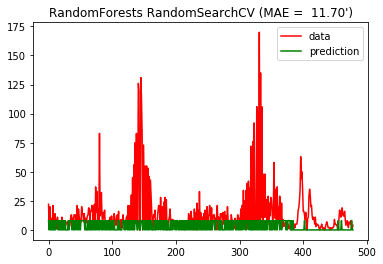

In [ ]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(test['total_cases'].shape[0]))
plt.plot(xx, test['total_cases'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests RandomSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

In [ ]:
#Ahora realizaré una optimización utilizando la técnica de Boosting
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

param_dist = {
 "n_estimators": [8, 32, 64, 128],
 "learning_rate" : [0.01,0.05,0.1],
 "loss" : ['linear', 'square', 'exponential']
 }

grid_ada = GridSearchCV(AdaBoostRegressor(DecisionTreeRegressor(criterion='mae')),
                        param_grid = param_dist, cv=5)

grid_ada.fit(X = train.drop(['total_cases'], axis=1),y = train['total_cases'])


best_ada = grid_ada.best_estimator_
print (best_ada)
# fit and predict
best_ada.fit( X = train.drop(['total_cases'], axis=1), y = train['total_cases'])
y_pred = best_ada.predict(X = test.drop(['total_cases'], axis = 1))

# EVALUATE 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['total_cases'], y_pred)
print ('MAE', mae)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mae',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=0.01, loss='square', n_estimators=8,
                  rando

In [ ]:
#Por último lo haré para GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor

param_dist = {
 "n_estimators": [32, 64, 128],
 "learning_rate" : [0.01,0.05,0.1,0.25,0.5],
  "max_features" : ["auto", "sqrt"],
 "loss" : ['ls', 'lad', 'huber', 'quantile'],
 "criterion": ['mae', 'friedman_mse']
 }

grid_gb = GridSearchCV(GradientBoostingRegressor(), param_grid = param_dist, cv=5)

grid_gb.fit(X = train.drop(['total_cases'], axis=1),y = train['total_cases'])


best_gb = grid_gb.best_estimator_
print (best_gb)
# fit and predict
best_gb.fit( X = train.drop(['total_cases'], axis=1), y = train['total_cases'])
y_pred = best_gb.predict(X = test.drop(['total_cases'], axis = 1))

# EVALUATE 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['total_cases'], y_pred)
print ('MAE', mae)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.5, loss='lad', max_depth=3,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=32,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
MAE 12.238164814443781


In [ ]:
# 0. load data from file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
#Sustituyo los valores nulos por su media
df=data_test.fillna(data_test.mean())
df.isnull().values.any()

False

In [ ]:
#Debido a que el menor MAE se consigue con la técnica de Boosting, esta técnica es la que utilizaré con los datos reales del dengue

# fit and predict
best_ada.fit( X = train.drop(['total_cases'], axis=1), y = train['total_cases'])
y_pred = best_ada.predict(X = dengue_test.drop(['city'], axis = 1))

# round the result and cast to int
import numpy as np
res = np.rint(y_pred) # round
res = res.astype(int) # cast to int
# generate output
output = pd.DataFrame({ 'city':data_test['city'],'total_cases': res}) #Este es el archivo que se somete en la competicion


from google.colab import files

with open('Nuche_dengue_result_op.csv', 'w') as f:
  output.to_csv(f,  index = False)
  

files.download('Nuche_dengue_result_op.csv')